In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv(r"H:\jpytr_pro\data science\data sets\home_loan.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002175,Male,Yes,0,Graduate,No,4750,2333.0,130.0,360.0,1.0,Urban,Y
238,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,Y
168,LP001579,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,N
212,LP001713,Male,Yes,1,Graduate,Yes,7787,0.0,240.0,360.0,1.0,Urban,Y
572,LP002855,Male,Yes,2,Graduate,No,16666,0.0,275.0,360.0,1.0,Urban,Y
198,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban,Y
501,LP002606,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
27,LP001073,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [9]:
df.isin(['?']).sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.isin([0]).sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

In [11]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

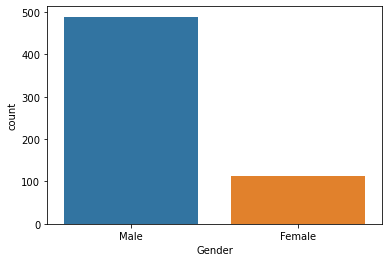

In [13]:
sns.countplot(data=df,x="Gender")

In [14]:
df['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

<AxesSubplot:xlabel='Married', ylabel='count'>

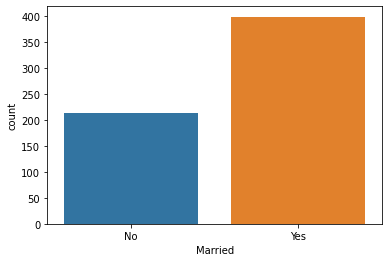

In [15]:
sns.countplot(data=df,x='Married')

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

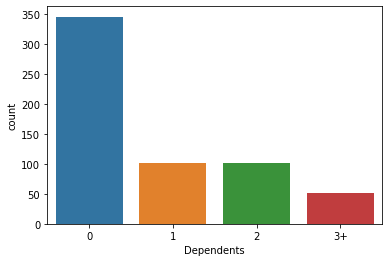

In [17]:
sns.countplot(data=df,x='Dependents')

In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

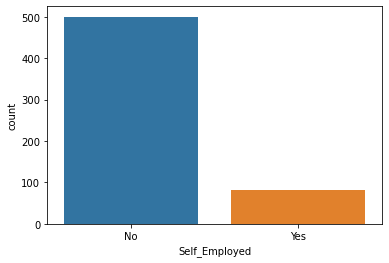

In [19]:
sns.countplot(data=df,x='Self_Employed')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

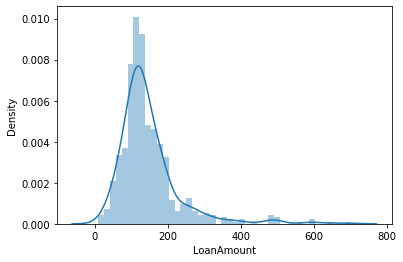

In [20]:
sns.distplot(df['LoanAmount'])

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

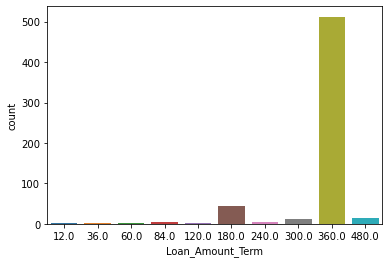

In [22]:
sns.countplot(data=df,x='Loan_Amount_Term')

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

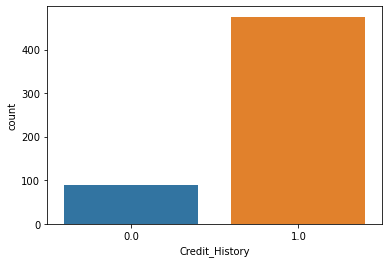

In [24]:
sns.countplot(data=df,x='Credit_History')

In [25]:
df['CoapplicantIncome'].isin([0]).sum()

273

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

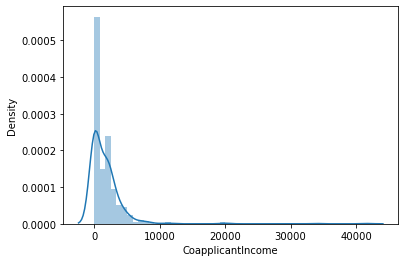

In [26]:
sns.distplot(df['CoapplicantIncome'])

In [27]:
df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean(),inplace=True)

In [28]:
df['CoapplicantIncome'].isin([0]).sum()

0

In [29]:
df['CoapplicantIncome']

0       1621.245798
1       1508.000000
2       1621.245798
3       2358.000000
4       1621.245798
5       4196.000000
6       1516.000000
7       2504.000000
8       1526.000000
9      10968.000000
10       700.000000
11      1840.000000
12      8106.000000
13      2840.000000
14      1086.000000
15      1621.245798
16      1621.245798
17      1621.245798
18      1621.245798
19      3500.000000
20      1621.245798
21      5625.000000
22      1911.000000
23      1917.000000
24      2925.000000
25      1621.245798
26      2253.000000
27      1040.000000
28      1621.245798
29      2083.000000
30      3369.000000
31      1621.245798
32      1621.245798
33      1667.000000
34      3000.000000
35      2067.000000
36      1330.000000
37      1459.000000
38      7210.000000
39      1668.000000
40      1621.245798
41      1213.000000
42      1621.245798
43      2336.000000
44      1621.245798
45      1621.245798
46      1621.245798
47      1621.245798
48      3440.000000
49      2275.000000


In [30]:
# filling nan values
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df['Dependents'].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [31]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y


In [33]:
#encoding data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
y=df['Gender'].values
df['Gender_']=le.fit_transform(y)
y=df['Married'].values
df['Married_']=le.fit_transform(y)
y=df['Education'].values
df['Education_']=le.fit_transform(y)
y=df['Self_Employed'].values
df['Self_Employed_']=le.fit_transform(y)
y=df['Property_Area'].values
df['Property_Area_']=le.fit_transform(y)
y=df['Loan_Status'].values
df['Loan_Status_']=le.fit_transform(y)

In [35]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_,Married_,Education_,Self_Employed_,Property_Area_,Loan_Status_
0,Male,No,0,Graduate,No,5849,1621.245798,128.0,360.0,1.0,Urban,Y,1,0,0,0,2,1
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y,1,1,0,1,2,1
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y,1,1,1,0,2,1
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y,1,0,0,0,2,1
5,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y,1,1,0,1,2,1
6,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y,1,1,1,0,2,1
7,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N,1,1,0,0,1,0
8,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y,1,1,0,0,2,1
9,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N,1,1,0,0,1,0


In [36]:
df.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_,Married_,Education_,Self_Employed_,Property_Area_,Loan_Status_
0,0,5849,1621.245798,128.0,360.0,1.0,1,0,0,0,2,1
1,1,4583,1508.000000,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,1621.245798,66.0,360.0,1.0,1,1,0,1,2,1
3,0,2583,2358.000000,120.0,360.0,1.0,1,1,1,0,2,1
4,0,6000,1621.245798,141.0,360.0,1.0,1,0,0,0,2,1


In [37]:
df['Dependents'].replace('3+',3,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Gender_            614 non-null    int32  
 7   Married_           614 non-null    int32  
 8   Education_         614 non-null    int32  
 9   Self_Employed_     614 non-null    int32  
 10  Property_Area_     614 non-null    int32  
 11  Loan_Status_       614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


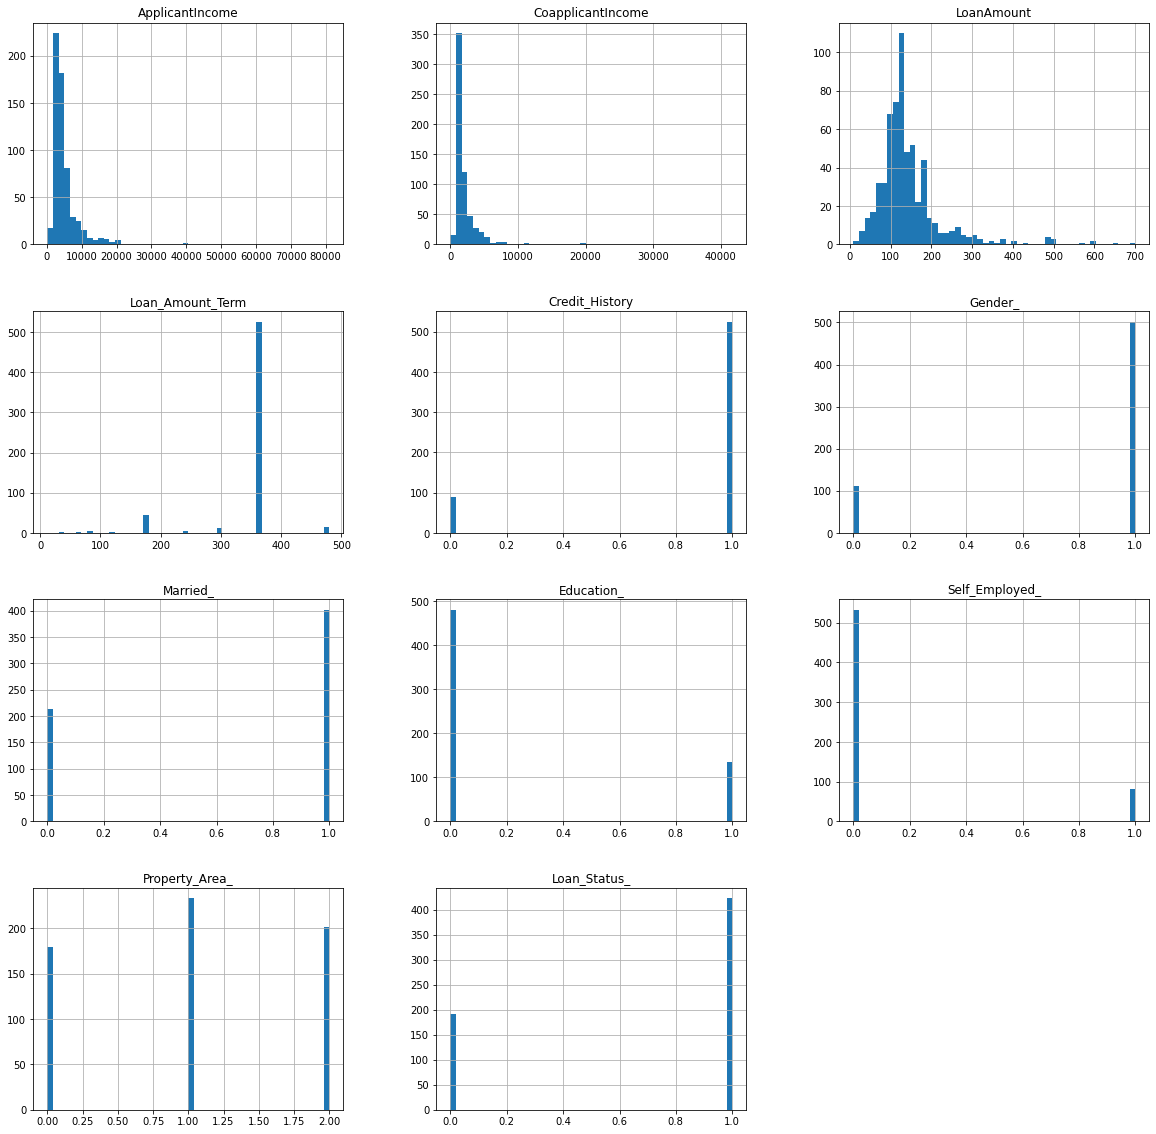

In [39]:
df.hist(bins = 50, figsize = (20,20))
plt.show()

In [40]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_,Married_,Education_,Self_Employed_,Property_Area_,Loan_Status_
ApplicantIncome,1.000000,-0.050734,0.565181,-0.046531,-0.018615,0.058809,0.051708,-0.140760,0.127180,-0.009500,-0.004710
CoapplicantIncome,-0.050734,1.000000,0.206453,-0.073210,0.008339,0.024156,-0.017504,-0.088032,0.013265,0.028111,-0.089189
LoanAmount,0.565181,0.206453,1.000000,0.036960,-0.000607,0.106904,0.146546,-0.168759,0.115100,-0.046632,-0.033214
Loan_Amount_Term,-0.046531,-0.073210,0.036960,1.000000,-0.004705,-0.074030,-0.100912,-0.073928,-0.033739,-0.076120,-0.022549
Credit_History,-0.018615,0.008339,-0.000607,-0.004705,1.000000,0.009170,0.010938,-0.073658,-0.001550,0.001963,0.540556
Gender_,0.058809,0.024156,0.106904,-0.074030,0.009170,1.000000,0.364569,0.045364,-0.000525,-0.025752,0.017987
Married_,0.051708,-0.017504,0.146546,-0.100912,0.010938,0.364569,1.000000,0.012304,0.004489,0.004257,0.091478
Education_,-0.140760,-0.088032,-0.168759,-0.073928,-0.073658,0.045364,0.012304,1.000000,-0.010383,-0.065243,-0.085884
Self_Employed_,0.127180,0.013265,0.115100,-0.033739,-0.001550,-0.000525,0.004489,-0.010383,1.000000,-0.030860,-0.003700
Property_Area_,-0.009500,0.028111,-0.046632,-0.076120,0.001963,-0.025752,0.004257,-0.065243,-0.030860,1.000000,0.032112


<AxesSubplot:>

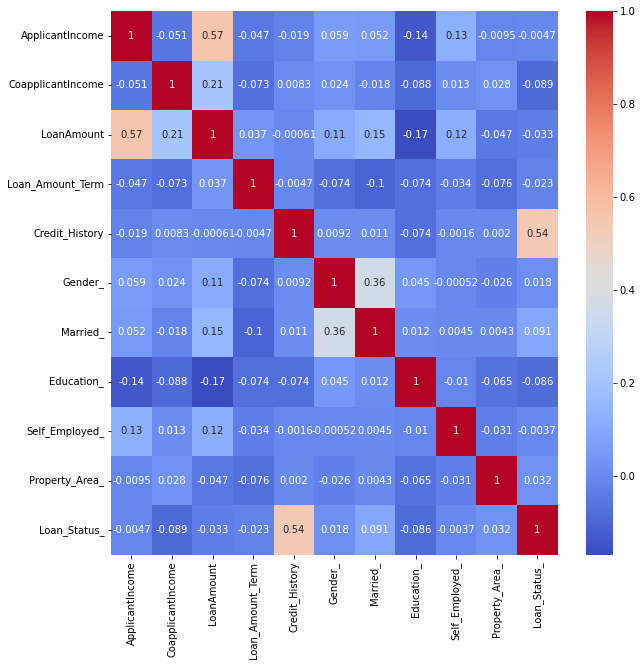

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

## Features Separating

In [42]:
X=df.drop('Loan_Status_', axis = 1)
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_,Married_,Education_,Self_Employed_,Property_Area_
0,0,5849,1621.245798,128.0,360.0,1.0,1,0,0,0,2
1,1,4583,1508.000000,128.0,360.0,1.0,1,1,0,0,0
2,0,3000,1621.245798,66.0,360.0,1.0,1,1,0,1,2
3,0,2583,2358.000000,120.0,360.0,1.0,1,1,1,0,2
4,0,6000,1621.245798,141.0,360.0,1.0,1,0,0,0,2
5,2,5417,4196.000000,267.0,360.0,1.0,1,1,0,1,2
6,0,2333,1516.000000,95.0,360.0,1.0,1,1,1,0,2
7,3,3036,2504.000000,158.0,360.0,0.0,1,1,0,0,1
8,2,4006,1526.000000,168.0,360.0,1.0,1,1,0,0,2
9,1,12841,10968.000000,349.0,360.0,1.0,1,1,0,0,1


In [43]:
y=df.Loan_Status_
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

# Using SMOTE

In [44]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X, y = smote.fit_resample(X, y)

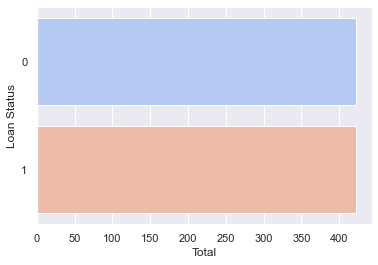

In [45]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## using StandardScaler

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=StandardScaler()
minmax=MinMaxScaler()

In [48]:
X = MinMaxScaler().fit_transform(X)

## spliting data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test =train_test_split(X,y ,test_size=0.3,random_state=4)

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()

In [52]:
log_r.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred1=log_r.predict(X_test)

# accuracy score

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
score1=accuracy_score(y_test, y_pred1)
print(score1*100)


75.98425196850394


In [56]:
# confusion matrix

print(confusion_matrix(y_test, y_pred1))

[[ 84  53]
 [  8 109]]


In [57]:
# classification report

print(classification_report(y_test, y_pred1))
p_score1=precision_score(y_test, y_pred1)*100
print(p_score1)
r_score1=recall_score(y_test, y_pred1,)*100
print(r_score1)

              precision    recall  f1-score   support

           0       0.91      0.61      0.73       137
           1       0.67      0.93      0.78       117

    accuracy                           0.76       254
   macro avg       0.79      0.77      0.76       254
weighted avg       0.80      0.76      0.76       254

67.28395061728395
93.16239316239316


# knn Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred2=knn.predict(X_test)

In [61]:
#accuracy score

score2=accuracy_score(y_test,y_pred2)
score2

0.7637795275590551

In [62]:
#confusion matrix

print(confusion_matrix(y_test,y_pred2))

[[ 90  47]
 [ 13 104]]


In [63]:
# classification report

print(classification_report(y_test, y_pred2))
p_score2=precision_score(y_test, y_pred2)*100
print(p_score2)
r_score2=recall_score(y_test, y_pred2,)*100
print(r_score2)

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       137
           1       0.69      0.89      0.78       117

    accuracy                           0.76       254
   macro avg       0.78      0.77      0.76       254
weighted avg       0.79      0.76      0.76       254

68.87417218543047
88.88888888888889


# Decision Tree classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [65]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred3=tree.predict(X_test)

In [67]:
# accuracy_acore

score3=accuracy_score(y_test,y_pred3)
score3

0.7834645669291339

In [68]:
#confusion_matrix

print(confusion_matrix(y_test,y_pred3))

[[109  28]
 [ 27  90]]


In [69]:
# classification report

print(classification_report(y_test, y_pred3))
p_score3=precision_score(y_test, y_pred3)*100
print(p_score3)
r_score3=recall_score(y_test, y_pred3,)*100
print(r_score3)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       137
           1       0.76      0.77      0.77       117

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254

76.27118644067797
76.92307692307693


# naive bayes classifier

In [70]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [71]:
nb.fit(X_train,y_train)

GaussianNB()

In [72]:
y_pred4=nb.predict(X_test)

In [73]:
# accuracy_score

score4=accuracy_score(y_test,y_pred4)
score4

0.7125984251968503

In [74]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred4))

[[ 72  65]
 [  8 109]]


In [75]:
# classification report

print(classification_report(y_test, y_pred4))
p_score4=precision_score(y_test, y_pred4)*100
print(p_score4)
r_score4=recall_score(y_test, y_pred4,)*100
print(r_score4)

              precision    recall  f1-score   support

           0       0.90      0.53      0.66       137
           1       0.63      0.93      0.75       117

    accuracy                           0.71       254
   macro avg       0.76      0.73      0.71       254
weighted avg       0.77      0.71      0.70       254

62.643678160919535
93.16239316239316


# SVc

In [76]:
from sklearn.svm import SVC
svc=SVC()

In [77]:
svc = SVC(C = 15, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01)

In [78]:
y_pred5=svc.predict(X_test)

In [79]:
# accuracy_score

score5=accuracy_score(y_test,y_pred5)
score5

0.7125984251968503

In [80]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred5))

[[ 65  72]
 [  1 116]]


In [81]:
# classification report

print(classification_report(y_test, y_pred5))
p_score5=precision_score(y_test, y_pred5)*100
print(p_score5)
r_score5=recall_score(y_test, y_pred5,)*100
print(r_score5)

              precision    recall  f1-score   support

           0       0.98      0.47      0.64       137
           1       0.62      0.99      0.76       117

    accuracy                           0.71       254
   macro avg       0.80      0.73      0.70       254
weighted avg       0.82      0.71      0.70       254

61.702127659574465
99.14529914529915


# Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =  GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)

In [83]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=180)

In [84]:
y_pred6 = gbc.predict(X_test)

In [85]:
# accuracy_score

score6=accuracy_score(y_test,y_pred6)
score6

0.8228346456692913

In [86]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred6))

[[106  31]
 [ 14 103]]


In [87]:
# classification report

print(classification_report(y_test, y_pred6))
p_score6=precision_score(y_test, y_pred6,)*100
print(p_score6)
r_score6=recall_score(y_test, y_pred6,)*100
print(r_score6)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       137
           1       0.77      0.88      0.82       117

    accuracy                           0.82       254
   macro avg       0.83      0.83      0.82       254
weighted avg       0.83      0.82      0.82       254

76.86567164179104
88.03418803418803


# Extreme Gradient Boosting

In [88]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [89]:
y_pred7 = xgb.predict(X_test)

In [90]:
# accuracy_score

score7=accuracy_score(y_test,y_pred7)
score7

0.8346456692913385

In [91]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred7))

[[111  26]
 [ 16 101]]


In [92]:
# classification report

print(classification_report(y_test, y_pred7))
p_score7=precision_score(y_test, y_pred7,)*100
print(p_score7)
r_score7=recall_score(y_test, y_pred7,)*100
print(r_score7)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       137
           1       0.80      0.86      0.83       117

    accuracy                           0.83       254
   macro avg       0.83      0.84      0.83       254
weighted avg       0.84      0.83      0.83       254

79.52755905511812
86.32478632478633


## Ada boost

In [93]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)

In [94]:
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [95]:
y_pred8 = ada.predict(X_test)

In [96]:
# accuracy_score

score8=accuracy_score(y_test,y_pred8)
score8

0.8031496062992126

In [97]:
#confussion_matrix

print(confusion_matrix(y_test,y_pred8))

[[ 98  39]
 [ 11 106]]


In [98]:
# classification report

print(classification_report(y_test, y_pred8))
p_score8=precision_score(y_test, y_pred8,)*100
print(p_score8)
r_score8=recall_score(y_test, y_pred8,)*100
print(r_score8)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       137
           1       0.73      0.91      0.81       117

    accuracy                           0.80       254
   macro avg       0.82      0.81      0.80       254
weighted avg       0.82      0.80      0.80       254

73.10344827586206
90.5982905982906


In [99]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree classifier','SVC','naive bayes classifier' , 
            'Gradient Boosting Classifier','XgBoost','Ada boost'],
    'Score': [score1,score2,score3,score4,score5,score6,score7,score8],
    'Precision_score':[p_score1,p_score2,p_score3,p_score4,p_score5,p_score6,p_score7,p_score8],
    'Recall_score':[r_score1,r_score2,r_score3,r_score4,r_score5,r_score6,r_score7,r_score8]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score,Precision_score,Recall_score
6,XgBoost,0.834646,79.527559,86.324786
5,Gradient Boosting Classifier,0.822835,76.865672,88.034188
7,Ada boost,0.803150,73.103448,90.598291
2,Decision Tree classifier,0.783465,76.271186,76.923077
1,KNN,0.763780,68.874172,88.888889
0,Logistic Regression,0.759843,67.283951,93.162393
3,SVC,0.712598,62.643678,93.162393
4,naive bayes classifier,0.712598,61.702128,99.145299


# Hyperparmeter Tuning
## xgb

In [100]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.038501073530849306

In [101]:
accuracies.mean()

0.8101694915254237

In [102]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [103]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search = GridSearchCV(estimator = xgb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = 4)
grid_search = grid_search.fit(X_train, y_train)

In [104]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [105]:
best_accuracy

0.816949152542373

In [106]:
best_parameters

{'colsample_bytree': 1.0,
 'gamma': 1,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 1.0}

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [108]:
parameters2 = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

In [109]:
grid_search2 = GridSearchCV(estimator = rf,
                           param_grid = parameters2,
                           scoring = 'accuracy',
                           n_jobs = 4)
grid_search_2 = grid_search2.fit(X_train, y_train)

In [110]:
best_accuracy2 = grid_search_2.best_score_
best_parameters2 = grid_search_2.best_params_

In [111]:
best_accuracy2

0.8169491525423729

In [112]:
best_parameters2

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 9}

#  K - Nearest Neighbors

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [114]:
parameters3 = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

In [115]:
grid_search3 = GridSearchCV(estimator = knn,
                           param_grid = parameters3,
                           scoring = 'accuracy',
                           n_jobs = 4)
grid_search_3 = grid_search3.fit(X_train, y_train)

In [116]:
best_accuracy3 = grid_search_3.best_score_
best_parameters3 = grid_search_3.best_params_

In [117]:
best_accuracy3

0.7389830508474577

In [118]:
best_parameters3

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
models2 = pd.DataFrame({
    'tuned Models': ['XgBoost','Random Forest','KNN',],
    'Score2':[best_accuracy,best_accuracy2,best_accuracy3]
})

models2.sort_values(by = 'Score2', ascending = False)